## Handling missing data

Missing values in a dataset can occur due to several reasons such as breakdown of measuring equipment, accidental removal of observations, lack of response by respondents, error on the part of the researcher, etc.

Let us read the dataset *GDP_missing_data.csv*, in which we have randomly removed some values, or put missing values in some of the columns. 

We'll also read *GDP_complete_data.csv*, in which we have not removed any values. We'll use this data later to assess the accuracy of our guess or estimate of missing values in *GDP_missing_data.csv*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
gdp_missing_values_data = pd.read_csv('./Datasets/GDP_missing_data.csv')
gdp_complete_data = pd.read_csv('./Datasets/GDP_complete_data.csv')

In [2]:
gdp_missing_values_data.head()

,economicActivityFemale,country,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,contraception,continent
0,7.2,Afghanistan,45.0,154.0,2474.0,87.5,NaN,85.0,46.0,Southern Asia,NaN,Asia
1,7.8,Algeria,67.5,44.0,11433.0,76.4,26.1,51.0,70.3,Northern Africa,NaN,Africa
2,41.3,Argentina,69.6,22.0,NaN,76.2,3.8,3.8,76.8,South America,NaN,South America
3,52.0,Armenia,67.2,25.0,13638.0,65.0,NaN,0.5,74.0,Western Asia,NaN,Asia
4,53.8,Australia,NaN,6.0,54891.0,NaN,1.0,1.0,81.2,Oceania,NaN,Oceania


Observe that the `gdp_missing_values_data` dataset consists of some missing values shown as NaN (Not a Number).

### Identifying missing values in a dataframe

There are multiple ways to identify missing values in a dataframe

#### `describe()` Method

Note that the descriptive statistics methods associated with Pandas objects ignore missing values by default. Consider the summary statistics of `gdp_missing_values_data`:

In [3]:
gdp_missing_values_data.describe()

,economicActivityFemale,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,contraception
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,84.000000
mean,45.935172,65.491724,37.158621,24193.482759,76.563448,13.570028,21.448897,70.615862,51.773810
std,16.875922,9.099256,34.465699,22748.764444,7.854730,16.497954,25.497045,9.923791,31.930026
min,1.900000,36.000000,3.000000,772.000000,51.200000,0.000000,0.000000,39.100000,0.000000
25%,35.500000,62.900000,10.000000,6837.000000,72.000000,1.000000,2.300000,67.500000,17.000000
50%,47.600000,67.800000,24.000000,15184.000000,77.300000,6.600000,9.720000,73.900000,65.000000
75%,55.900000,72.400000,54.000000,35957.000000,81.600000,19.500000,30.200000,78.100000,77.000000
max,90.600000,77.400000,169.000000,122740.000000,93.000000,70.500000,90.800000,82.900000,79.000000


Observe that the `count` statistics report the number of non-missing values of each column in the data, as the number of rows in the data (see code below) is more than the number of non-missing values of all the variables in the above table. Similarly, for the rest of the statistics, such as `mean`, `std`, etc., the missing values are ignored.

In [4]:
#The dataset gdp_missing_values_data has 155 rows
gdp_missing_values_data.shape[0]

155

#### `info()` Method

Shows the count of non-null entries in each column, helping you quickly identify columns with missing values.

In [5]:
gdp_missing_values_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   economicActivityFemale  145 non-null    float64
 1   country                 155 non-null    object 
 2   lifeMale                145 non-null    float64
 3   infantMortality         145 non-null    float64
 4   gdpPerCapita            145 non-null    float64
 5   economicActivityMale    145 non-null    float64
 6   illiteracyMale          145 non-null    float64
 7   illiteracyFemale        145 non-null    float64
 8   lifeFemale              145 non-null    float64
 9   geographic_location     155 non-null    object 
 10  contraception           84 non-null     float64
 11  continent               155 non-null    object 
dtypes: float64(9), object(3)
memory usage: 14.7+ KB


#### `isnull()` Method

This is one of the most direct methods. Using [`df.isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) returns a DataFrame of Boolean values where `True` indicates a missing value. To get a summary, you can use `df.isnull().sum()` to see the count of missing values in each column.

For finding the number of missing values in each column of `gdp_missing_values_data`, we will sum up the missing values in each column of the dataset:

In [6]:
gdp_missing_values_data.isnull().sum()

economicActivityFemale    10
country                    0
lifeMale                  10
infantMortality           10
gdpPerCapita              10
economicActivityMale      10
illiteracyMale            10
illiteracyFemale          10
lifeFemale                10
geographic_location        0
contraception             71
continent                  0
dtype: int64

### Types of Missing Values

In data science, missing values typically fall into three main types, each requiring different handling strategies:

####  Missing Completely at Random (MCAR)
- **Definition**: Missing values are entirely independent of any variables in the dataset.
- **Example**: A respondent accidentally skips a question on a survey.
- **Impact**: MCAR data can usually be ignored or imputed without biasing the analysis.
- **Handling**: Simple imputation methods, like filling with mean or median values, are often appropriate.

#### Missing at Random (MAR)
- **Definition**: The likelihood of a value being missing is related to other observed variables but not to the missing data itself.
- **Example**: People with higher incomes may be less likely to report their spending, but income data itself is not missing.
- **Impact**: Ignoring MAR values may bias results, so careful imputation based on related variables is recommended.
- **Handling**: More complex imputation methods, like conditional mean imputation or predictive modeling, are suitable.

#### Missing Not at Random (MNAR)
- **Definition**: The probability of missingness is related to the missing data itself, meaning the value is systematically missing.
- **Example**: Patients with severe health conditions might be less likely to report their health status, or students with low scores may be less likely to submit their grades.
- **Impact**: MNAR is the most challenging type, as missing values may introduce significant bias.
- **Handling**: Solutions often include sensitivity analysis, data augmentation, or modeling techniques that account for the missing mechanism, though sometimes domain-specific approaches are necessary.

Understanding the type of missing data helps in selecting the right imputation method and mitigating potential biases in the analysis.


### Questions

#### 
Why can we ignore observations with missing values without risking skewing the analysis or trends in the case of **Missing Completely at Random (MCAR)**?

#### 

Why could ignoring missing values lead to biased results for **Missing at Random (MAR)** and **Missing Not at Random (MNAR)** data?


#### 
For the datset consisting of GDP per capita, think of hypothetical scenarios in which the missing values of GDP per capita can correspond to **MCAR / MAR / MNAR**.

### Methods for Handling missing values

#### Removing Missing values

* **Row/Column Removal**: Use [`df.dropna()`] (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
  * When to Use: if the missing values are few or the rows/columns are not critical.
  * Risks: Can reduce the dataset's size, potentially losing valuable information.

Let us drop the rows containing even a single value from `gdp_missing_values_data`.

In [7]:
gdp_no_missing_data = gdp_missing_values_data.dropna()

By default, `df.dropna()` will drop any row that contains at least one missing value, leaving only the rows that are completely free of missing values.

In [8]:
#Shape of gdp_no_missing_data
gdp_no_missing_data.shape

(42, 12)

Using `df.dropna()` to remove rows with missing values can sometimes lead to a significant reduction in data, which can be problematic if much of the data is valuable and non-missing. For example:

* **Impact of Default Behavior**: Dropping rows with even a single missing value reduced the number of rows from 155 to 42! This drastic reduction happens because, by default, dropna() removes any row with at least one missing value, keeping only rows that are completely complete.

* **Loss of Non-Missing Data**: Even though some columns may have very few missing values (e.g., at most 10), using dropna() without modification results in losing all non-missing data in affected rows. This is typically a poor choice, especially when valuable, non-missing data is removed unnecessarily.

To avoid losing too much data, you can adjust the behavior of `dropna()` using these parameters:

* `how` Parameter
  - Controls the criteria for dropping rows or columns.
  - `how='any'` (default): Drops rows or columns if any values are missing.
  - `how='all': Drops rows or columns only if all values are missing

* `thresh` Parameter
  - Sets a minimum number of non-missing values required to retain the row or column.
  - Useful when you want to keep rows or columns with substantial, but not complete, data.


 If a few values of a column are missing, we can possibly estimate them using the rest of the data, so that we can (hopefully) maximize the information that can be extracted from the data. However, if most of the values of a column are missing, it may be harder to estimate its values.

In this dataset, we see that around 50% values of the `contraception` column is missing. Thus, we'll drop the column as it may be hard to impute its values based on a relatively small number of non-missing values.

In [9]:
#Deleting column with missing values in almost half of the observations
gdp_missing_values_data.drop(['contraception'],axis=1,inplace=True)
gdp_missing_values_data.shape

(155, 11)

#### Imputing Missing values

There are an unlimited number of ways to impute missing values. Some imputation methods are provided in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

The best way to impute them will depend on the problem:

* **For MCAR**: Simple imputation is generally acceptable.
* **For MAR**: Imputation should consider relationships with other variables, such as using conditional mean imputation.
* **For MNAR**: Imputation requires careful analysis, and domain knowledge is essential to avoid bias.

Below are some of the most common methods. Recall that we randomly introduced missing values in `gdp_missing_values_data`, while the actual values are preserved in `gdp_complete_data`.

We will apply these methods to `gdp_missing_values_data`. To evaluate each method’s effectiveness in imputing missing values, we’ll compare the imputed gdpPerCapita values with the actual values and calculate the `Root Mean Square Error` (RMSE).

To visualize the imputed vs actual values, let's define a helper function

In [10]:
#Index of rows with missing values for GDP per capita
null_ind_gdpPC = gdp_missing_values_data.index[gdp_missing_values_data.gdpPerCapita.isnull()]

#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted(y):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    # y = y.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y.loc[null_ind_gdpPC,'gdpPerCapita'])
    z=np.polyfit(x,y.loc[null_ind_gdpPC,'gdpPerCapita'],1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    plt.title('Actual vs Imputed values for GDP per capita',fontsize=20)
    rmse = np.sqrt(np.mean((y.loc[null_ind_gdpPC,'gdpPerCapita']-x)**2))
    plt.text(10000, 50000, 'RMSE = %.2f'%rmse, fontsize=15)

##### Mean/Median/Mode Imputation

This approach replaces missing values with the mean or median of the column.

Let’s impute missing values in the column by substituting them with the average of the non-missing values. Imputing with the mean tends to minimize the sum of squared differences between actual values and imputed values, especially in cases where data is Missing Completely at Random (MCAR). However, this might not hold true for other types of missing data, such as Missing at Random (MAR) or Missing Not at Random (MNAR).

Let us impute missing values in the column as the average of the non-missing values of the column. The sum of squared differences between actual values and the imputed values is likely to be smaller if we impute using the mean. However, this may not be true in cases other than MCAR (Missing completely at random).

In [11]:
# Extracting the columns with missing values
columns_with_missing = [col for col in gdp_missing_values_data.columns if gdp_missing_values_data[col].isnull().any()]
columns_with_missing

['economicActivityFemale',
 'lifeMale',
 'infantMortality',
 'gdpPerCapita',
 'economicActivityMale',
 'illiteracyMale',
 'illiteracyFemale',
 'lifeFemale']

In [12]:
# Imputing missing values using the mean
gdp_imputed_data_mean = gdp_missing_values_data[columns_with_missing].fillna(gdp_missing_values_data[columns_with_missing].mean())

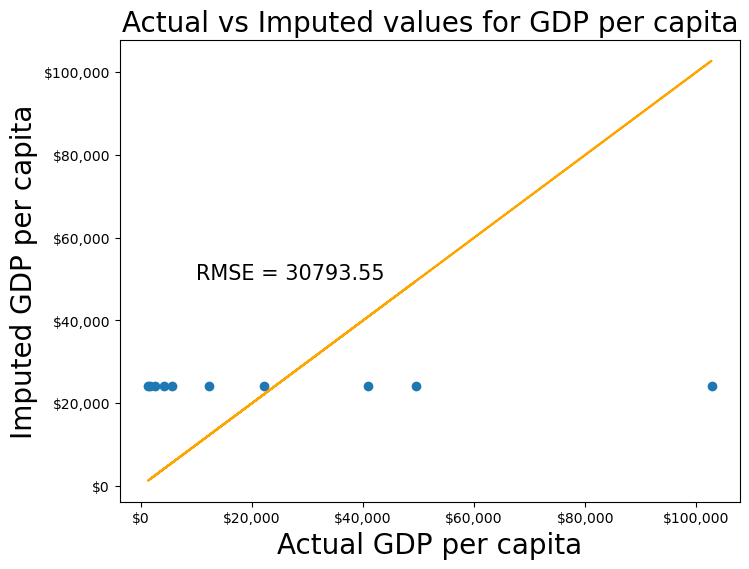

In [13]:
plot_actual_vs_predicted(gdp_imputed_data_mean)

Here, since all columns with missing values are numerical, we could use the mean to impute these values. Using the mean is generally suitable only for numerical data, as it represents a central tendency specific to numbers. For categorical data, however, mean imputation would be inappropriate. Instead, the mode, which identifies the most frequently occurring value, is a more suitable choice for imputing missing values in categorical columns.

##### Conditional Imputation: Use other related variables to predict missing values

* Based on correlated variables
* KNN
* Linear Regression

* **Imputing missing values based on correlated variables in the data**

If a variable is highly correlated with another variable in the dataset, we can approximate its missing values using the trendline with the highly correlated variable.

Let us visualize the distribution of GDP per capita for different continents.

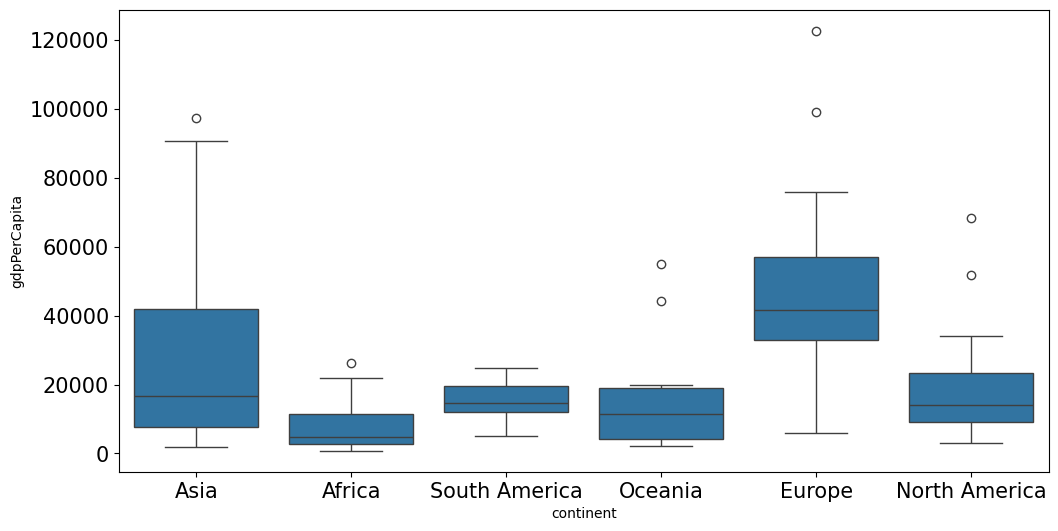

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
sns.boxplot(x = 'continent',y='gdpPerCapita',data = gdp_missing_values_data);

We observe that there is a distinct difference between the GDPs per capita of some of the contents. Let us impute the missing GDP per capita of a country as the mean GDP per capita of the corresponding continent. This imputation should be better than imputing the missing GDP per capita as the mean of all the non-missing values, as the GDP per capita of a country is likely to be closer to the mean GDP per capita of the continent, rather the mean GDP per capita of the whole world.

In [15]:
#Finding the mean GDP per capita of the continent - please defer the understanding of this code to chapter 9.
avg_gdpPerCapita = gdp_missing_values_data['gdpPerCapita'].groupby(gdp_missing_values_data['continent']).mean()
avg_gdpPerCapita

continent
Africa            7638.178571
Asia             25922.750000
Europe           45455.303030
North America    19625.210526
Oceania          15385.857143
South America    15360.909091
Name: gdpPerCapita, dtype: float64

In [16]:
#Creating a copy of missing data to impute missing values
gdp_imputed_data_group_mean = gdp_missing_values_data.copy()

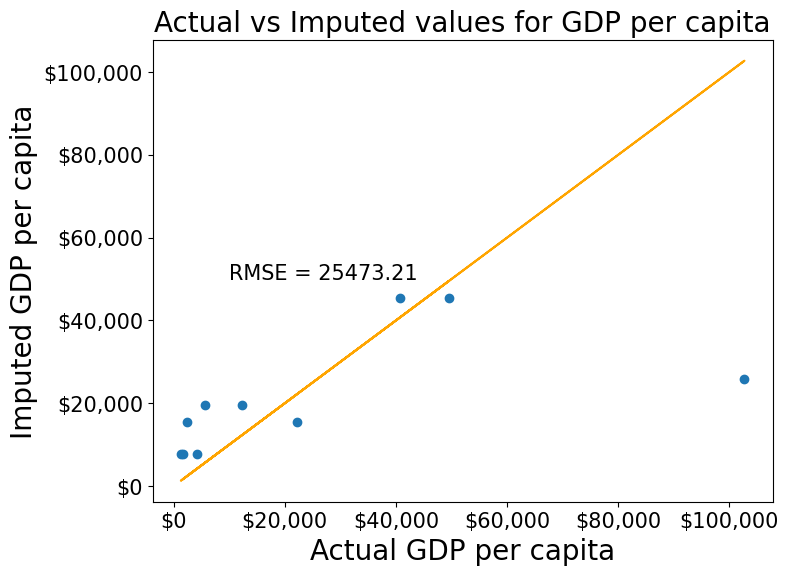

In [17]:
#Replacing missing GDP per capita with the mean GDP per capita for the corresponding continent

gdp_imputed_data_group_mean.gdpPerCapita = \
gdp_imputed_data_group_mean['gdpPerCapita'].fillna(gdp_imputed_data_group_mean['continent'].map(avg_gdpPerCapita))
plot_actual_vs_predicted(gdp_imputed_data_group_mean)

Note that the imputed values are closer to the actual values, and the RMSE has further reduced as expected.

Suppose we wish to impute the missing values of each numeric column with the average of the non-missing values of the respective column corresponding to the continent of the observation. The above logic can be extended to each column as shown in the code below.

In [18]:
all_columns_imputed_data = gdp_missing_values_data.iloc[:,[0,2,3,4,5,6,7,8]].apply(lambda x:\
x.fillna(gdp_imputed_data_group_mean['continent'].map(x.groupby(gdp_missing_values_data['continent']).mean())))

**Using Regression**

In [19]:
#Let us identify the variable highly correlated with GDP per capita.
gdp_missing_values_data.select_dtypes(include='number').corrwith(gdp_missing_values_data.gdpPerCapita)

economicActivityFemale    0.078332
lifeMale                  0.579850
infantMortality          -0.572201
gdpPerCapita              1.000000
economicActivityMale     -0.134108
illiteracyMale           -0.479143
illiteracyFemale         -0.448273
lifeFemale                0.615954
dtype: float64

In [20]:
#The variable *lifeFemale* has the strongest correlation with GDP per capita. Let us use it to impute missing values of GDP per capita.

#  Extract the variables lifeFemale and GDP per capita
x = gdp_missing_values_data.lifeFemale
y = gdp_missing_values_data.gdpPerCapita

#  Identify non-missing indices
idx_non_missing = np.isfinite(x) & np.isfinite(y)

# Fit a linear regression model (degree=1) to predict GDP per capita given lifeFemale
slope_intercept_trendline = np.polyfit(x[idx_non_missing],y[idx_non_missing],1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline)

#Creating a copy of missing data to impute missing values
gdp_imputed_data_lr = gdp_missing_values_data.copy()

#Imputing missing values of GDP per capita using the linear regression model
gdp_imputed_data_lr.loc[null_ind_gdpPC,'gdpPerCapita']=compute_y_given_x(gdp_missing_values_data.loc[null_ind_gdpPC,'lifeFemale'])


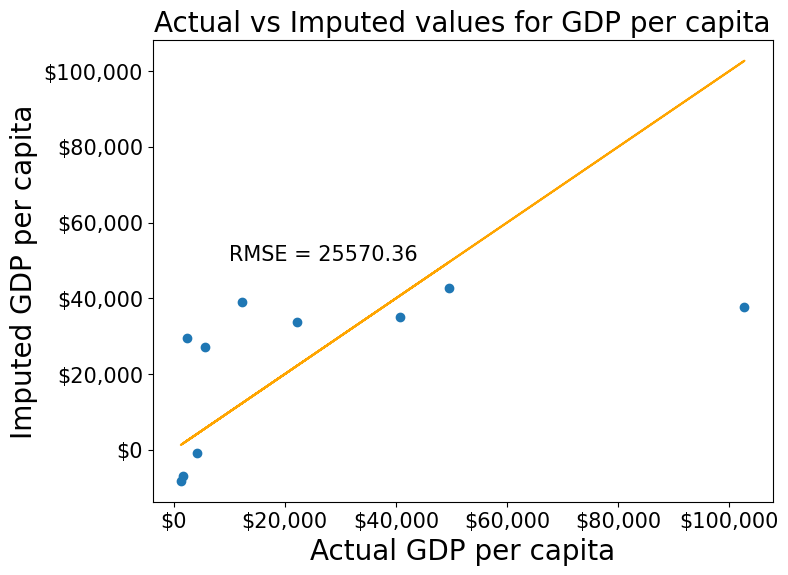

In [21]:
plot_actual_vs_predicted(gdp_imputed_data_lr)

**KNN: K-nearest neighbor**

In this method, we'll impute the missing value of the variable as the mean value of the $K$-nearest neighbors having non-missing values for that variable. The neighbors to a data-point are identified based on their Euclidean distance to the point in terms of the standardized values of rest of the variables in the data.

Let's consider a toy example to understand missing value imputation by KNN. Suppose we have to impute missing values in a toy dataset, named as `toy_data` having 4 observations and 3 variables.

In [22]:
#Toy example - A 4x3 array with missing values
nan = np.nan
toy_data = np.array([[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]])
toy_data

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

We'll use some functions from the *sklearn* library to perform the KNN imputation. It is much easier to directly use the algorithm from *sklearn*, instead of coding it from scratch.

In [23]:
#Library to compute pair-wise Euclidean distance between all observations in the data
from sklearn import metrics

#Library to impute missing values with the KNN algorithm
from sklearn import impute

We'll use the *sklearn* function [nan_euclidean_distances()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html) to compute the Euclidean distance between all pairs of observations in the data.

In [24]:
#This is the distance matrix containing the distance of the ith observation from the jth observation at the (i,j) position in the matrix
metrics.pairwise.nan_euclidean_distances(toy_data,toy_data)

array([[ 0.        ,  3.46410162,  6.92820323, 11.29158979],
       [ 3.46410162,  0.        ,  3.46410162,  7.54983444],
       [ 6.92820323,  3.46410162,  0.        ,  3.46410162],
       [11.29158979,  7.54983444,  3.46410162,  0.        ]])

Note that the size of the above matrix is 4x4. This is because the $(i,j)^{th}$ element of the matrix is the distance of the $i^{th}$ observation from the $j^{th}$ observation. The matrix is symmetric because the distance of $i^{th}$ observation to the $j^{th}$ observation is the same as the distance of the $j^{th}$ observation to the $i^{th}$ observation.

We'll use the *sklearn* function [KNNImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) to impute the missing value of a column in `toy_data` as the mean of the values of the $K$ nearest neighbors to the observation that have non-missing values for that column.

Let us impute the missing values in `toy_data` using the values of $K=2$ nearest neighbors from the corresponding observation.

In [25]:
#imputing missing values with 2 nearest neighbors, where the neighbors have equal weights

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=2)

#Use the object method 'fit_transform' to impute missing values
imputer.fit_transform(toy_data)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

The third observation was the closest to the $2nd$ and $4th$ observations based on the Euclidean distance matrix. Thus, the missing value in the $3rd$ row of the `toy_data` has been imputed as the mean of the values in the $2nd$ and $4th$ observations for the corresponding column. Similarly, the $1st$ observation is the closest to the $2nd$ and $3rd$ observations. Thus the missing value in the $1st$ row of `toy_data` has been imputed as the mean of the values in the $1st$ and $2nd$ observations for the corresponding column.

Let us use KNN to impute the missing values of `gdpPerCapita` in `gdp_missing_values_data`. We'll use only the numeric columns of the data in imputing the missing values. Also, we'll ignore `contraception` as it has a lot of missing values, and thus may not be useful.

In [26]:
#Considering numeric columns in the data to use KNN
num_cols = list(range(0,1))+list(range(2,9))
num_cols

[0, 2, 3, 4, 5, 6, 7, 8]

Before computing the pair-wise Euclidean distance of observations, we must standardize the data so that all columns are at the same scale. This will avoid columns with a higher magnitude of values having a higher weight in determining the Euclidean distance. Unless there is a reason to give a higher weight to a column, we assume all columns to have the same weight in the Euclidean distance computation.

We can use the code below to scale the data. However, after imputing the missing values, the data is to be scaled back to the original scale, so that each variable is in the same units as in the original dataset. However, if the code below is used, we'll lose the orginal scale of each of the columns.

In [27]:
#Scaling data to compute equally weighted distances from the 'k' nearest neighbors
scaled_data = gdp_missing_values_data.iloc[:,num_cols].apply(lambda x:(x-x.min())/(x.max()-x.min()))

To alleviate the problem of losing the orignial scale of the data, we'll use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) object of the *sklearn* library. The object will store the original scale of the data, which will help transform the data back to the original scale once the missing values have been imputed in the standardized data.

In [28]:
# Scaling data - using sklearn

#Create an object of type MinMaxScaler
scaler = sk.preprocessing.MinMaxScaler()

#Use the object method 'fit_transform' to scale the values to a standard uniform distribution
scaled_data = pd.DataFrame(scaler.fit_transform(gdp_missing_values_data.iloc[:,num_cols]))

In [29]:
#Imputing missing values with KNNImputer

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=3, weights="uniform")

#Use the object method 'fit_transform' to impute missing values
imputed_arr = imputer.fit_transform(scaled_data)

In [30]:
#Scaling back the scaled array to obtain the data at the original scale

#Use the object method 'inverse_transform' to scale back the values to the original scale of the data
unscaled_data = scaler.inverse_transform(imputed_arr)

In [31]:
#Note the method imputes the missing value of all the columns
#However, we are interested in imputing the missing values of only the 'gdpPerCapita' column
gdp_imputed_data_knn = gdp_missing_values_data.copy()
gdp_imputed_data_knn.loc[:,'gdpPerCapita'] = unscaled_data[:,3]

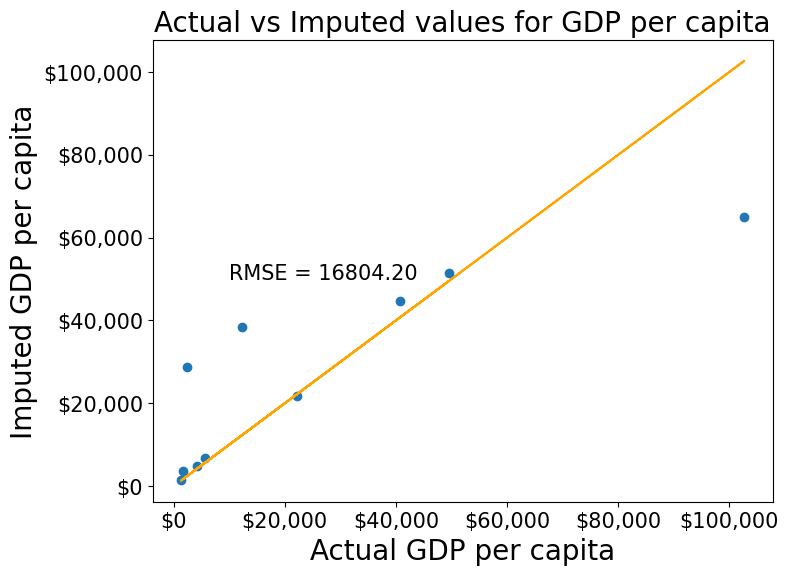

In [32]:
#Visualizing the accuracy of missing value imputation with KNN
plot_actual_vs_predicted(gdp_imputed_data_knn)

Note that the RMSE is the lowest in this method. It is because this method imputes missing values as the average of the values of "similar" observations, which is smarter and more robust than the previous methods.

We chose $K=3$ in the missing value imputation for GDP per capita. However, the value of $K$ is typically chosen using a method known as cross validation. We'll learn about cross-validation in the next course of the sequence.

##### Forward Fill/Backward Fill

To fill missing values in a column by copying the value of the previous or next non-missing observation, we can use forward fill (propagating the last valid observation forward) or backward fill (propagating the next valid observation backward).

Below, we demonstrate forward fill. To perform backward fill instead, simply replace `ffill` with `bfill`


In [33]:
#Filling missing values: Method 1- Naive way
gdp_imputed_data = gdp_missing_values_data.fillna(method = 'ffill')

C:\Users\lsi8012\AppData\Local\Temp\ipykernel_12848\1555899051.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_imputed_data = gdp_missing_values_data.fillna(method = 'ffill')


In [34]:
#Checking if any missing values are remaining
gdp_imputed_data.isnull().sum()

economicActivityFemale    0
country                   0
lifeMale                  0
infantMortality           0
gdpPerCapita              0
economicActivityMale      0
illiteracyMale            1
illiteracyFemale          0
lifeFemale                0
geographic_location       0
continent                 0
dtype: int64

After imputing missing values, note there is still one missing value for *illiteracyMale*. Can you guess why one missing value remained?

Let us check how good is this method in imputing missing values. We'll compare the imputed values of `gdpPerCapita` with the actual values. Recall that we had randomly put some missing values in `gdp_missing_values_data`, and we have the actual values in `gdp_complete_data`.

In [35]:
#Index of rows with missing values for GDP per capita
null_ind_gdpPC = gdp_missing_values_data.index[gdp_missing_values_data.gdpPerCapita.isnull()]

In [36]:
#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    y = gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE=",rmse)

RMSE= 34843.91091137732


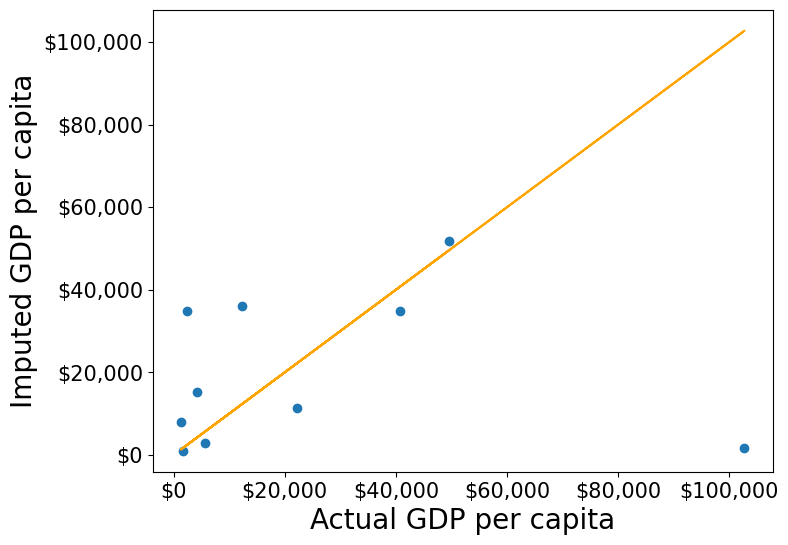

In [37]:
#Plot comparing imputed values with actual values, and computing the Root mean square error (RMSE) of the imputed values
plot_actual_vs_predicted()

We observe that the accuracy of imputation is poor as GDP per capita can vary a lot across countries, and the data is not sorted by GDP per capita. There is no reason why the GDP per capita of a country should be close to the GDP per capita of the country in the observation above it.

## Outlier detection

An outlier is an observation that is significantly different from the rest of the data. Detection of outliers is important as they may distort the general trends in data.

The dataset *College.csv* contains information about US universities. The description of variables of the dataset can be found on page 54 of this [book](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf).

In [38]:
college = pd.read_csv('./Datasets/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15



Let us visualize outliers in average instructional expenditure per student given by the variable `Expend`.

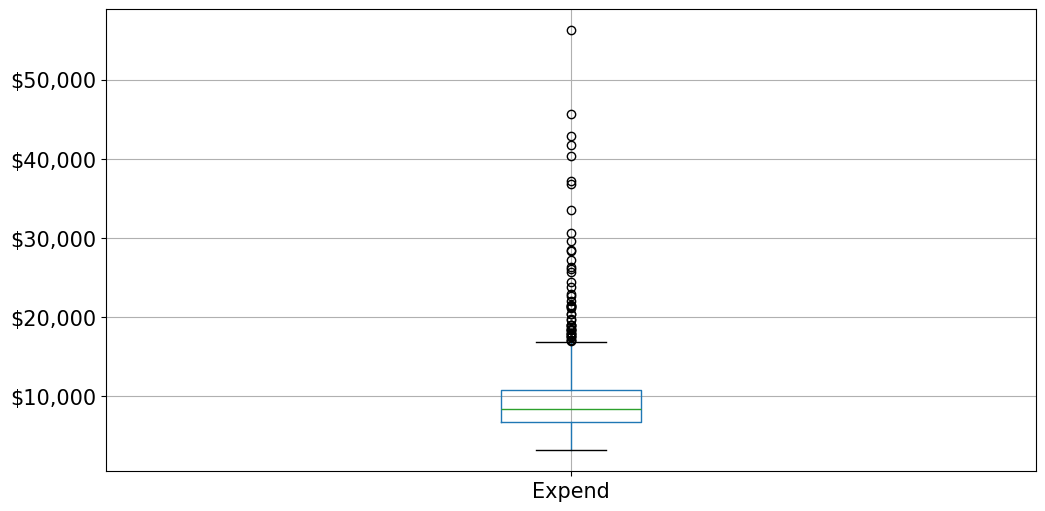

In [39]:
ax=college.boxplot(column = 'Expend')
ax.yaxis.set_major_formatter('${x:,.0f}')

There are several outliers (shown as circles in the above boxplot), which correspond to high values of average instructional expenditure per student. Boxplot identifies outliers based on the [Tukey's fences](https://en.wikipedia.org/wiki/Outlier) criterion:

**Tukey's fences:**
John Tukey proposed that observations outside the range $[Q1 - 1.5(Q3-Q1), Q3+1.5(Q3-Q1)]$ are outliers, where $Q1$ and $Q3$ are the lower $(25\%)$ and upper $(75\%)$ quartiles respectively. Let us detect outliers based on Tukey's fences.

In [40]:
#Finding upper and lower quartiles and interquartile range
q1 = np.percentile(college['Expend'],25)
q3 = np.percentile(college['Expend'],75)
intQ_range = q3-q1

In [41]:
#Tukey's fences
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

In [42]:
#These are the outlying observations - those outside of Tukey's fences
Outlying_obs = college[(college.Expend<Lower_fence) | (college.Expend>Upper_fence)]

In [43]:
#Data without outliers
college_data_without_outliers = college[((college.Expend>=Lower_fence) & (college.Expend<=Upper_fence))]

Earlier, the trend was distorted by outliers when we created bins of equal width. Let us see if we get the correct trend with the outliers removed from the data.

In [44]:
Binned_data = pd.cut(college_data_without_outliers['Expend'],3,labels = ['Low expend','Med expend','High expend'],retbins = True)
college_data_without_outliers.loc[:,'Expend_bin'] = Binned_data[0]

C:\Users\lsi8012\AppData\Local\Temp\ipykernel_12848\2673864035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_data_without_outliers.loc[:,'Expend_bin'] = Binned_data[0]


<Axes: xlabel='Expend_bin', ylabel='Grad.Rate'>

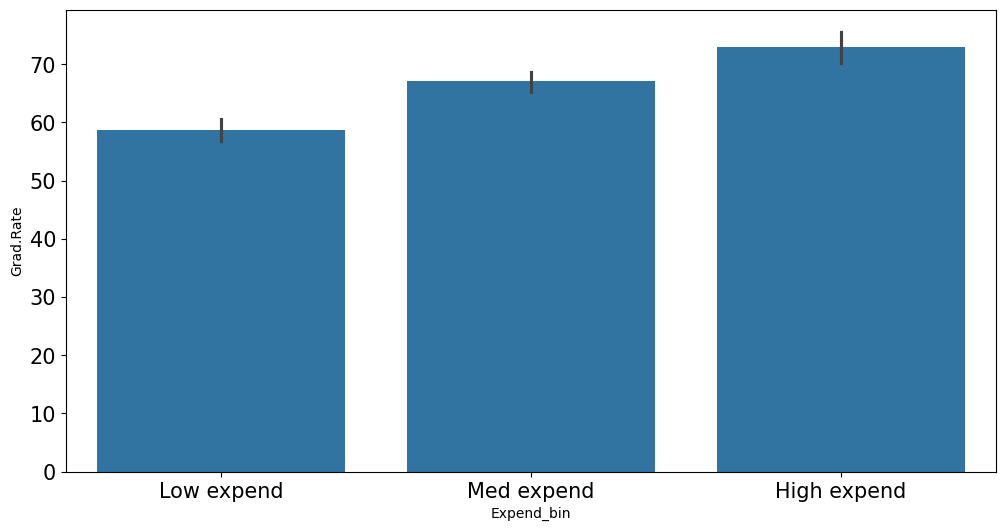

In [45]:
sns.barplot(x = 'Expend_bin', y = 'Grad.Rate', data = college_data_without_outliers)

With the outliers removed, we obtain the correct overall trend, even in the case of equal-width bins. Note that these bins have unequal number of observations as shown below.

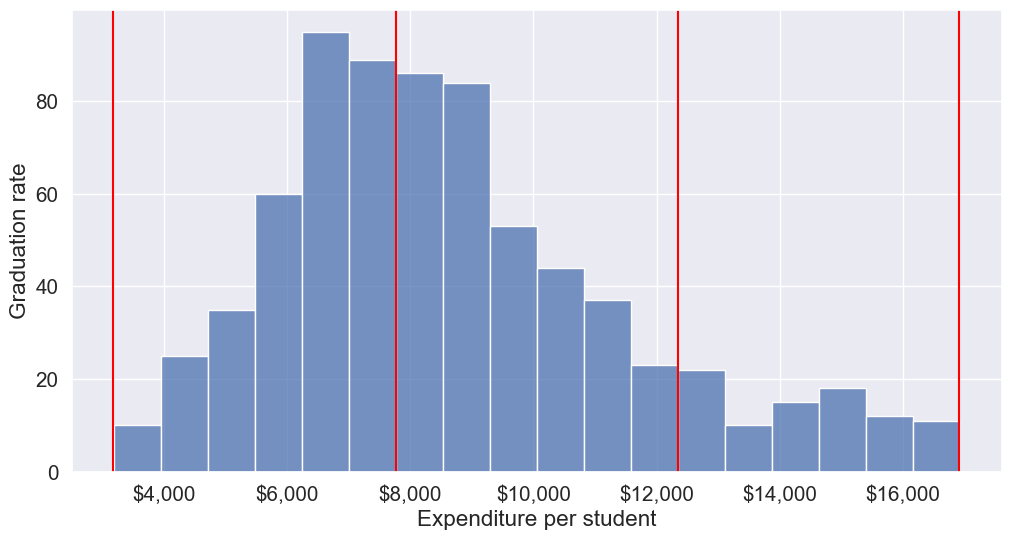

In [46]:
sns.set(font_scale=1.35)
ax=sns.histplot(data = college_data_without_outliers, x= 'Expend')
for i in range(4):
    plt.axvline(Binned_data[1][i], 0,100,color='red')
plt.xlabel('Expenditure per student');
plt.ylabel('Graduation rate');
ax.xaxis.set_major_formatter('${x:,.0f}')

Note that the right tail of the histogram has disappered since we removed outliers.

In [47]:
college_data_without_outliers['Expend_bin'].value_counts()

Expend_bin
Med expend     327
Low expend     314
High expend     88
Name: count, dtype: int64

## Data binning
Data binning is a method to group values of a continuous / categorical variable into bins (or categories). Binning may help with 

(i) Better intepretation of data \
(ii) Making better recommendations \
(iii) Smooth data, reduce noise

Examples:

**Binning to better interpret data**

1. The number of flu cases everyday may be binned to seasons such as fall, spring, winter and summer, to understand the effect of season on flu.

**Binning to make recommendations:** 

2. A doctor may like to group patient age into bins. Grouping patient ages into categories such as Age <=12, 12<Age<=18, 18<Age<=65, Age>65 may help recommend the kind/doses of covid vaccine a patient needs.

3. A credit card company may want to bin customers based on their spend, as "High spenders", "Medium spenders" and "Low spenders". Binning will help them design customized marketing campaigns for each bin, thereby increasing customer response (or revenue). On the other hand, they use the same campaign for customers withing the same bin, thus minimizng marketing costs.

**Binning to smooth data, and reduce noise** 

4. A sales company may want to bin their total sales to a weekly / monthly / yearly level to reduce the noise in day-to-day sales. 


**Example:** The dataset *College.csv* contains information about US universities. The description of variables of the dataset can be found on page 54 of this [book](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf). Let's see if we can apply binning to better interpret the association of instructional expenditure per student (`Expend`) with graduation rate (`Grad.Rate`) for US universities, and make recommendations.

In [48]:
college = pd.read_csv('./Datasets/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


To visualize the association between two numeric variables, we typically make a scatterplot. Let us make a scatterplot of graduation rate with expenditure per student, with a trendline.

Text(0, 0.5, 'Graduation rate')

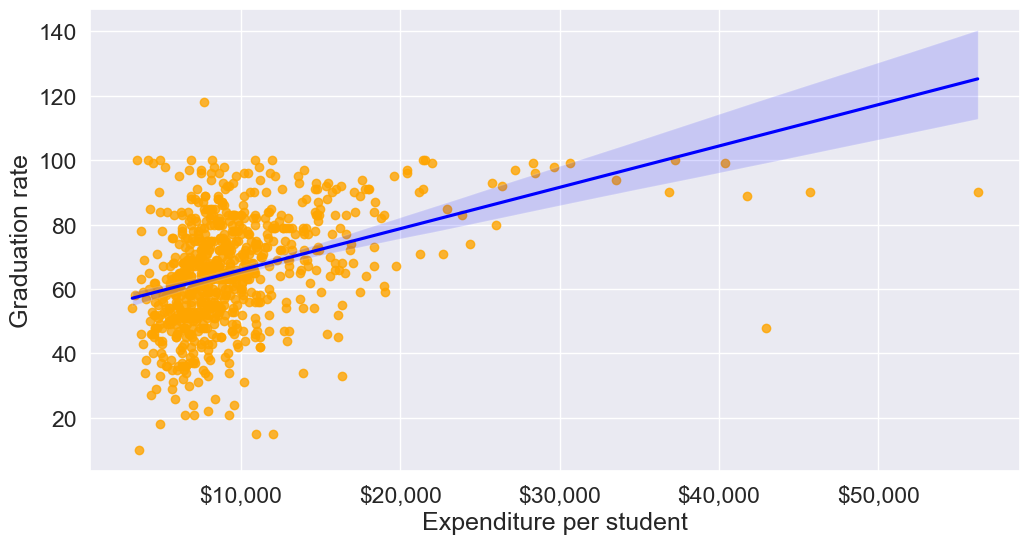

In [49]:
#Let's make a scatterplot of 'Grad.Rate' vs 'Expend' with a trendline, to visualize any trend(s).
sns.set(font_scale=1.5)
ax=sns.regplot(data = college, x = "Expend", y = "Grad.Rate",scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.set_xlabel('Expenditure per student')
ax.set_ylabel('Graduation rate')

The trendline indicates a positive correlation between `Expend` and `Grad.Rate`. However, there seems to be a lot of noise and presence of outliers in the data, which makes it hard to interpret the overall trend.

We'll bin `Expend` to see if we can better analyze its association with `Grad.Rate`. However, let us first visualize the distribution of `Expend`.

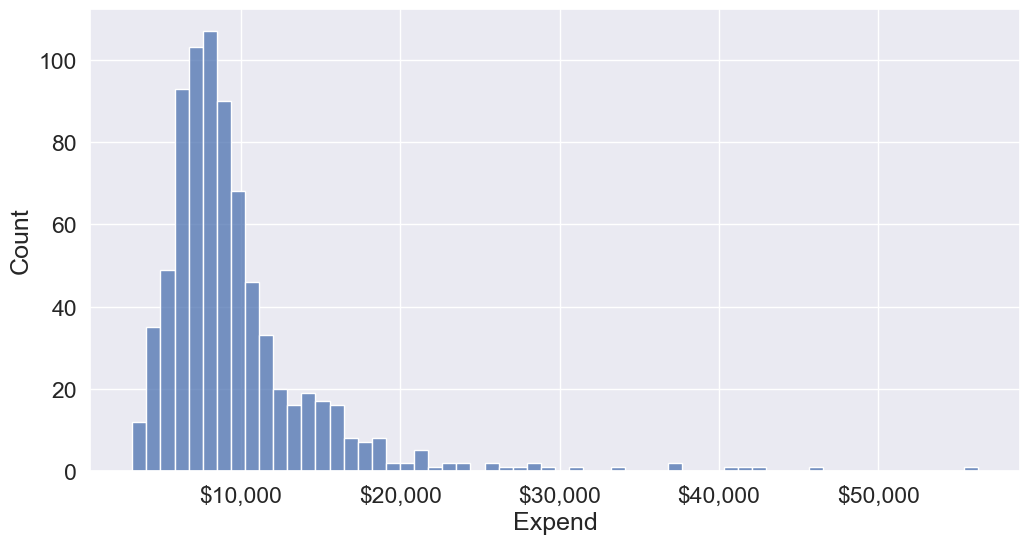

In [50]:
#Visualizing the distribution of expend
ax=sns.histplot(data = college, x= 'Expend')
ax.xaxis.set_major_formatter('${x:,.0f}')

The distribution of `Extend` is right skewed with potentially some extremely high outlying values.

### Binning with equal width bins

We'll use the Pandas function [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to bin `Expend`. This function creates bins such that all bins have the same width.

In [51]:
#Using the cut() function in Pandas to bin "Expend"
Binned_expend = pd.cut(college['Expend'],3,retbins = True)
Binned_expend

(0      (3132.953, 20868.333]
 1      (3132.953, 20868.333]
 2      (3132.953, 20868.333]
 3      (3132.953, 20868.333]
 4      (3132.953, 20868.333]
                ...          
 772    (3132.953, 20868.333]
 773    (3132.953, 20868.333]
 774    (3132.953, 20868.333]
 775     (38550.667, 56233.0]
 776    (3132.953, 20868.333]
 Name: Expend, Length: 777, dtype: category
 Categories (3, interval[float64, right]): [(3132.953, 20868.333] < (20868.333, 38550.667] < (38550.667, 56233.0]],
 array([ 3132.953     , 20868.33333333, 38550.66666667, 56233.        ]))

The [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function returns a tuple of length 2. The first element of the tuple are the bins, while the second element is an array containing the cut-off values for the bins.

In [52]:
type(Binned_expend)

tuple

In [53]:
len(Binned_expend)

2

Once the bins are obtained, we'll add a column in the dataset that indicates the bin for `Expend`.

In [54]:
#Creating a categorical variable to store the level of expenditure on a student
college['Expend_bin'] = Binned_expend[0]
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Expend_bin
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,"(3132.953, 20868.333]"
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,"(3132.953, 20868.333]"
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,"(3132.953, 20868.333]"
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,"(3132.953, 20868.333]"
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,"(3132.953, 20868.333]"


See the variable `Expend_bin` in the above dataset.

Let us visualize the `Expend` bins over the distribution of the `Expend` variable.

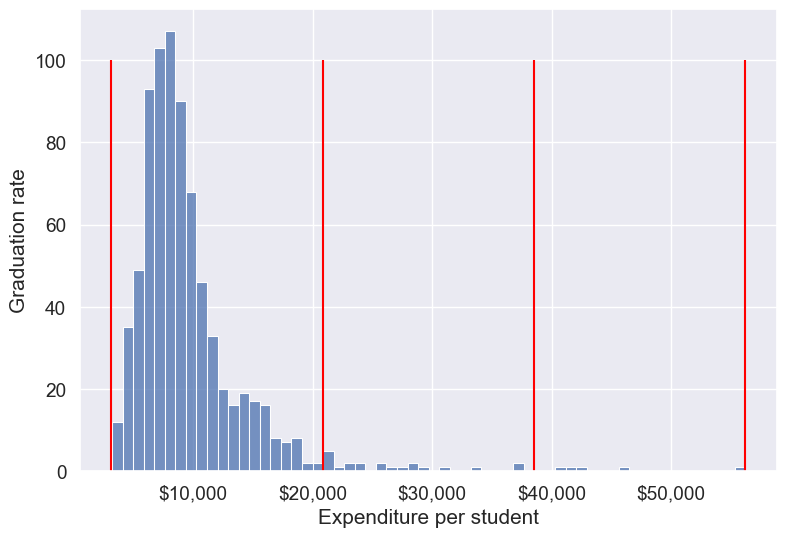

In [55]:
#Visualizing the bins for instructional expediture on a student
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
ax=sns.histplot(data = college, x= 'Expend')
plt.vlines(Binned_expend[1], 0,100,color='red')
plt.xlabel('Expenditure per student');
plt.ylabel('Graduation rate');
ax.xaxis.set_major_formatter('${x:,.0f}')

By default, the bins created have equal width. They are created by dividing the range between the maximum and minimum value of `Expend` into the desired number of equal-width intervals. We can label the bins as well as follows.

In [56]:
college['Expend_bin'] = pd.cut(college['Expend'],3,labels = ['Low expend','Med expend','High expend'])
college['Expend_bin']

0       Low expend
1       Low expend
2       Low expend
3       Low expend
4       Low expend
          ...     
772     Low expend
773     Low expend
774     Low expend
775    High expend
776     Low expend
Name: Expend_bin, Length: 777, dtype: category
Categories (3, object): ['Low expend' < 'Med expend' < 'High expend']

Now that we have binned the variable `Expend`, let us see if we can better visualize the association of graduation rate with expenditure per student using `Expened_bin`.

<Axes: xlabel='Expend_bin', ylabel='Grad.Rate'>

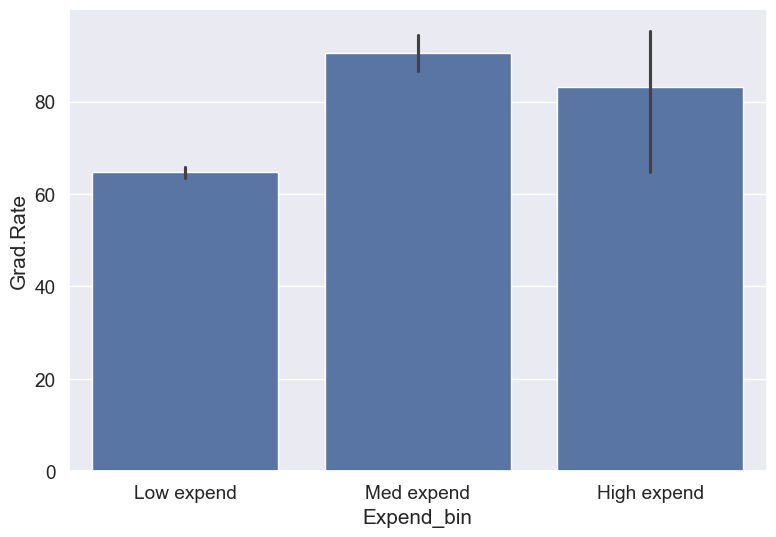

In [57]:
#Visualizing average graduation rate vs categories of instructional expenditure per student
sns.barplot(x = 'Expend_bin', y = 'Grad.Rate', data = college)

It seems that the graduation rate is the highest for universities with medium level of expenditure per student. This is different from the trend we saw earlier in the scatter plot. Let us investigate.

Let us find the number of universities in each bin.

In [58]:
pd.value_counts(college['Expend_bin'])

C:\Users\lsi8012\AppData\Local\Temp\ipykernel_12848\90039880.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(college['Expend_bin'])


Expend_bin
Low expend     751
Med expend      21
High expend      5
Name: count, dtype: int64

The bin `High expend` consists of only 5 universities, or 0.6% of all the universities in the dataset. These universities may be outliers that are skewing the trend (as also evident in the histogram above). 

In such cases, we should bin observations such that all bins are of equal size, i.e., they have the same number of observations.

### Binning with equal sized bins

Let us bin the variable `Expend` such that each bin consists of the same number of observations.

We'll use the Pandas function [qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) to make equal-sized bins (in contrast to equal-width bins in the previous section).

In [59]:
#Using the Pandas function qcut() to create bins with the same number of observations
Binned_expend = pd.qcut(college['Expend'],3,retbins = True)
college['Expend_bin'] = Binned_expend[0]

Each bin has the same number of observations with `qcut()`:

In [60]:
pd.value_counts(college['Expend_bin'])

C:\Users\lsi8012\AppData\Local\Temp\ipykernel_12848\90039880.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(college['Expend_bin'])


Expend_bin
(3185.999, 7334.333]    259
(7334.333, 9682.333]    259
(9682.333, 56233.0]     259
Name: count, dtype: int64

Let us visualize the `Expend` bins over the distribution of the `Expend` variable.

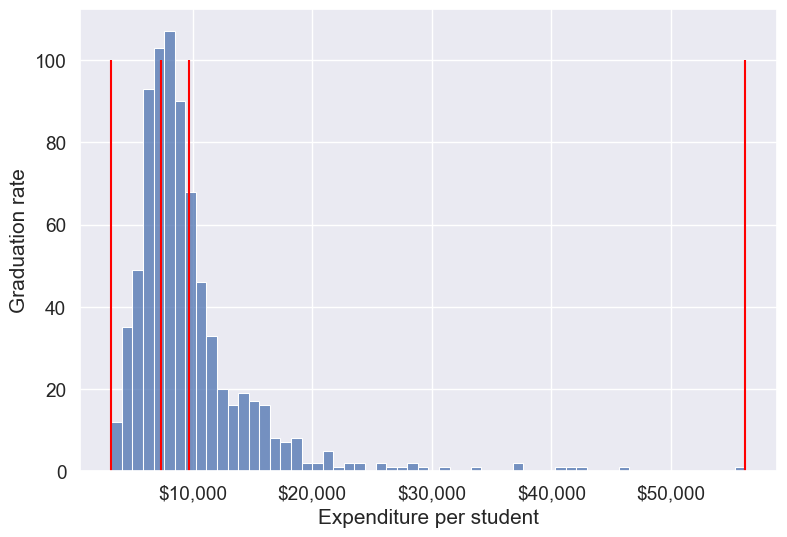

In [61]:
#Visualizing the bins for instructional expediture on a student
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
ax=sns.histplot(data = college, x= 'Expend')
plt.vlines(Binned_expend[1], 0,100,color='red')
plt.xlabel('Expenditure per student');
plt.ylabel('Graduation rate');
ax.xaxis.set_major_formatter('${x:,.0f}')

Note that the bin-widths have been adjusted to have the same number of observations in each bin. The bins are narrower in domains of high density, and wider in domains of sparse density.

Let us again make the barplot visualizing the average graduate rate with level of instructional expenditure per student.

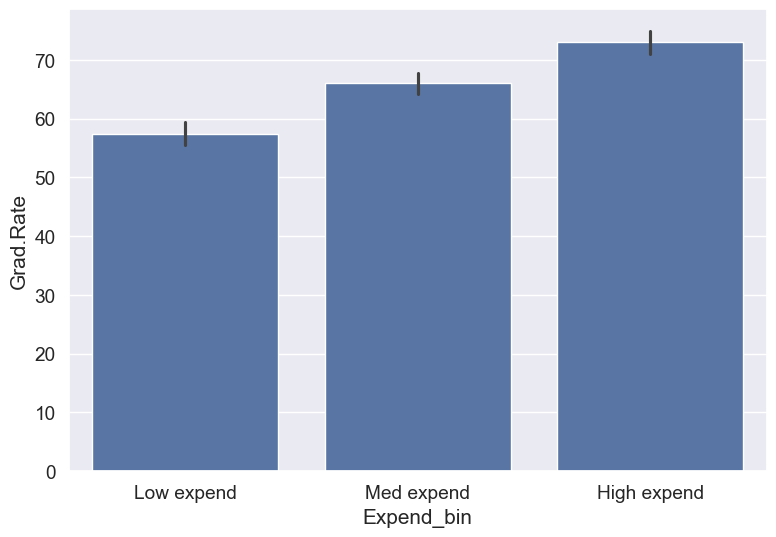

In [62]:
college['Expend_bin'] = pd.qcut(college['Expend'],3,labels = ['Low expend','Med expend','High expend'])
a=sns.barplot(x = 'Expend_bin', y = 'Grad.Rate', data = college)

Now we see the same trend that we saw in the scatterplot, but without the noise. We have smoothed the data. Note that making equal-sized bins helps reduce the effect of outliers in the overall trend.

Suppose this analysis was done to provide recommendations to universities for increasing their graduation rate. With binning, we can can provide one recommendation to *'Low expend'* universities, and another one to *'Med expend'* universities. For example, the recommendations can be: 

1. *'Low expend'* universities can expect an increase of 9 percentage points in `Grad.Rate`, if they migrate to the *'Med expend'* category.
2. *'Med expend'* universities can expect an increase of 7 percentage points in `Grad.Rate`, if they migrate to the *'High expend'* category.

The numbers in the above recommendations are based on the table below.

In [63]:
college['Grad.Rate'].groupby(college.Expend_bin).mean()

C:\Users\lsi8012\AppData\Local\Temp\ipykernel_12848\2173657746.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  college['Grad.Rate'].groupby(college.Expend_bin).mean()


Expend_bin
Low expend     57.343629
Med expend     66.057915
High expend    72.988417
Name: Grad.Rate, dtype: float64

We can also make recommendations based on the confidence intervals of mean Grad.Rate. Confidence intervals are computed below. We are finding confidence intervals based on a method known as bootstrapping. Refer https://en.wikipedia.org/wiki/Bootstrapping_(statistics) for a detailed description of Bootstrapping.

In [64]:
#Bootstrapping to find 95% confidence intervals of Graduation Rate of US universities based on average expenditure per student
for expend_bin in college.Expend_bin.unique():
    data_sub = college.loc[college.Expend_bin==expend_bin,:]
    samples = np.random.choice(data_sub['Grad.Rate'], size=(10000,data_sub.shape[0]))
    print("95% Confidence interval of Grad.Rate for "+expend_bin+" univeristies = ["+str(np.round(np.percentile(samples.mean(axis=1),2.5),2))+","+str(np.round(np.percentile(samples.mean(axis=1),97.5),2))+"]")

95% Confidence interval of Grad.Rate for Low expend univeristies = [55.33,59.32]
95% Confidence interval of Grad.Rate for High expend univeristies = [71.05,74.9]
95% Confidence interval of Grad.Rate for Med expend univeristies = [64.19,67.93]


Apart from equal-width and equal-sized bins, custom bins can be created using the *bins* argument. Suppose, bins are to be created for `Expend` with cutoffs $\$10,000, \$20,000, \$30,000... \$60,000$. Then, we can use the *bins* argument as in the code below:

### Binning with custom bins

In [65]:
Binned_expend = pd.cut(college.Expend,bins = list(range(0,70000,10000)),retbins=True)

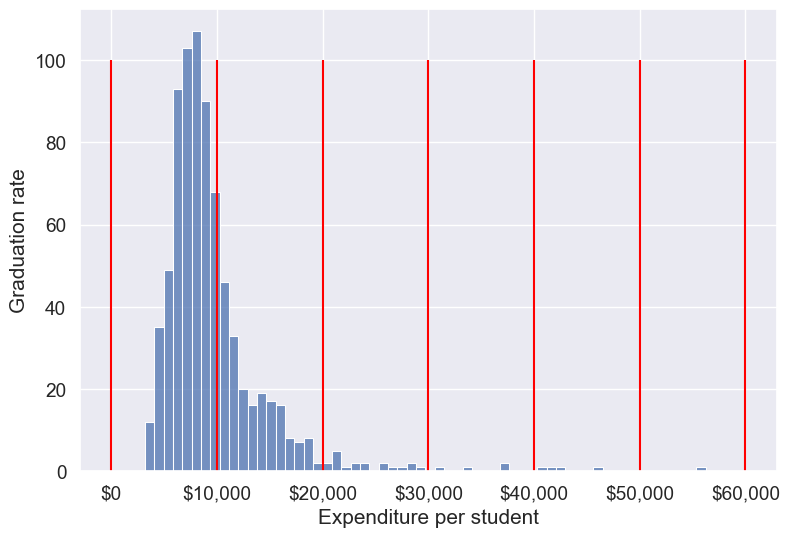

In [66]:
#Visualizing the bins for instructional expediture on a student
ax=sns.histplot(data = college, x= 'Expend')
plt.vlines(Binned_expend[1], 0,100,color='red')
plt.xlabel('Expenditure per student');
plt.ylabel('Graduation rate');
ax.xaxis.set_major_formatter('${x:,.0f}')

As custom bin-cutoffs can be specified with the `cut()` function, custom bin quantiles can be specified with the `qcut()` function.

## Dummy / Indicator variables

Dummy variables (or indicator variables) take only the values of 0 and 1 to indicate the presence or absence of a catagorical effect. They are particularly useful in regression modeling to help explain the dependent variable. 

If a column in a DataFrame has $k$ distinct values, we will get a DataFrame with $k$ columns containing 0s and 1s with the Pandas [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function.

Let us make dummy variables with the equal-sized bins we created for the average instruction expenditure per student.

In [67]:
#Using the Pandas function qcut() to create bins with the same number of observations
Binned_expend = pd.qcut(college['Expend'],3,retbins = True,labels = ['Low_expend','Med_expend','High_expend'])
college['Expend_bin'] = Binned_expend[0]

In [68]:
#Making dummy variables based on the levels (categories) of the 'Expend_bin' variable
dummy_Expend = pd.get_dummies(college['Expend_bin'])

The dummy data `dummy_Expend` has a value of $1$ if the observation corresponds to the category referenced by the column name.

In [69]:
dummy_Expend.head()

,Low_expend,Med_expend,High_expend
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,False,True


We can find the correlation between the dummy variables and graduation rate to identify if any of the dummy variables will be useful to estimate graduation rate (`Grad.Rate`).

In [70]:
#Finding if dummy variables will be useful to estimate 'Grad.Rate'
dummy_Expend.corrwith(college['Grad.Rate'])

Low_expend    -0.334456
Med_expend     0.024492
High_expend    0.309964
dtype: float64

The dummy variables `Low expend` and `High expend` may contribute in explaining `Grad.Rate` in a regression model.

## Independent Study

### Practice exercise 1

Read *survey_data_clean.csv*. Split the columns of the dataset, such that all columns with categorical values transform into dummy variables with each category corresponding to a column of 0s and 1s. Leave the *Timestamp* column. 

As all categorical columns are transformed to dummy variables, all columns have numeric values. 

What is the total number of columns in the transformed data? What is the total number of columns of the original data?

Find the:

1. Top 5 variables having the highest positive correlation with `NU_GPA`.

2. Top 5 variables having the highest negative correlation with `NU_GPA`.

### Practice exercise 2

Consider the dataset *survey_data_clean.csv* . Find the number of outliers in each column of the dataset based on the Tukey's fences criterion. Do not use a `for` loop.

Which column(s) have the maximum number of outliers?

Do you think the outlying observations identified with the Tukey's fences criterion for those columns(s) should be considered as outliers? If not, then which type of columns should be considered when finding outliers?

Using Tukey's criterion, the variables `learning_style_Reading/Writing (learn best through words often note-taking or reading)` and `much_effort_is_lack_of_talent` have the most number of outliers.